In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

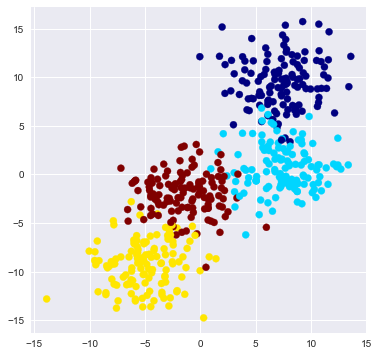

In [21]:
from sklearn.datasets import make_blobs

X,y= make_blobs(n_samples=500,centers=4,random_state=8,cluster_std=2.4)

plt.figure(figsize=(6,6))
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='jet') # y as label

In [15]:
from sklearn.tree import DecisionTreeClassifier

In [34]:
def visualise_tree(classifier, X,y, boundaries=True, xlim=None,ylim=None):
    classifier.fit(X,y)
    if xlim is None:
        xlim=(X[:,0].min()-0.1, X[:,0].max()+0.1)
    if ylim is None: 
        ylim=(X[:,1].min()-0.1,X[:,1].max()+0.1)
        
    x_min,x_max=xlim
    y_min, y_max=ylim
        
    xx,yy = np.meshgrid(np.linspace(x_min,x_max,100), np.linspace(y_min,y_max,100))
    
    Z=classifier.predict(np.c_[xx.ravel(),yy.ravel()]).reshape(xx.shape)
    
    plt.figure(figsize=(10,10))
    plt.pcolormesh(xx,yy,Z,alpha=0.2,cmap='jet')
    plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='jet')
    plt.xlim(x_min,x_max)
    plt.ylim(y_min,y_max)
    
    def plot_boundaries(i,xlim,ylim):
        if i<0:
            return
        
        if classifier.tree_[i]==0:
            plt.plot([classifier.tree_.threshold[i],classifier.tree_.threshold[i]],ylim,'-k')
            plot_boundaries(classifier.tree_.children_left[i],
                                           [xlim[0],classifier.tree_.threshold[i]],ylim)
            plot_boundaries(classifier.tree_.children_right[i],
                                           [classifier.tree_.threshold[i],xlim[1]],ylim)
        
        elif classifier.tree_.feature[i] == 1:
            plt.plot(xlim, [classifier.tree_.threshold[i], classifier.tree_.threshold[i]], '-k')
            plot_boundaries(classifier.tree_.children_left[i], xlim,
                            [ylim[0], classifier.tree_.threshold[i]])
            plot_boundaries(classifier.tree_.children_right[i], xlim,
                            [classifier.tree_.threshold[i], ylim[1]])
            
        if boundaries:
            plot_plot_boundaries(0,plt.xlim(),plt.ylim())

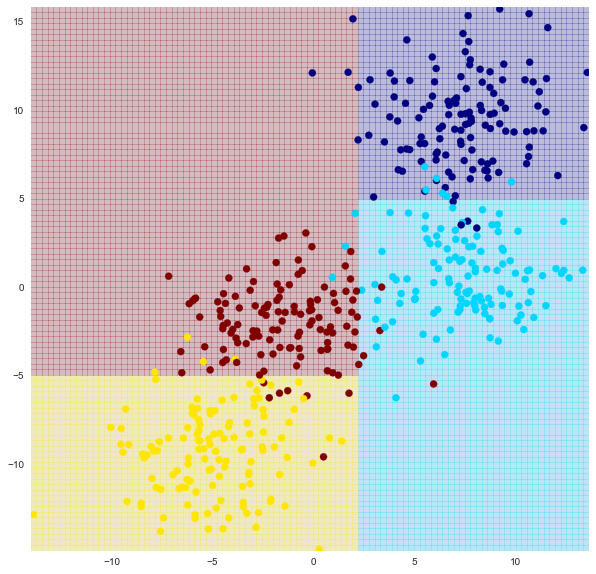

In [37]:
clf= DecisionTreeClassifier(max_depth=2,random_state=0)
visualise_tree(clf,X,y)

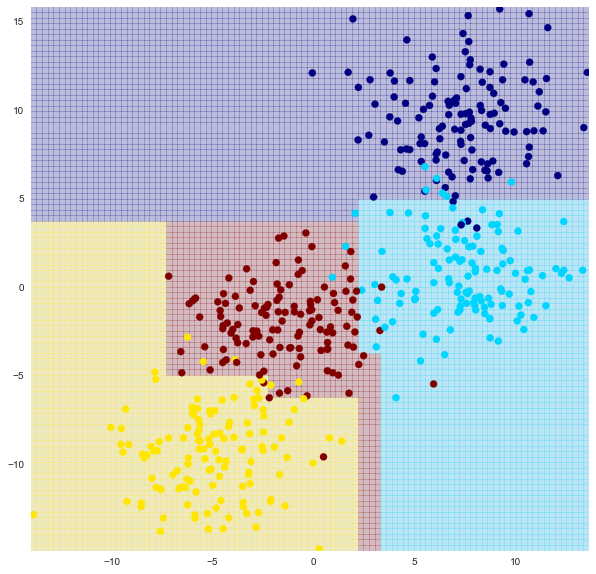

In [39]:
clf= DecisionTreeClassifier(max_depth=4,random_state=0) # overfit
visualise_tree(clf,X,y)

[Overfitting](http://www.saedsayad.com/decision_tree_overfitting.htm) -> ensemble (random forest)

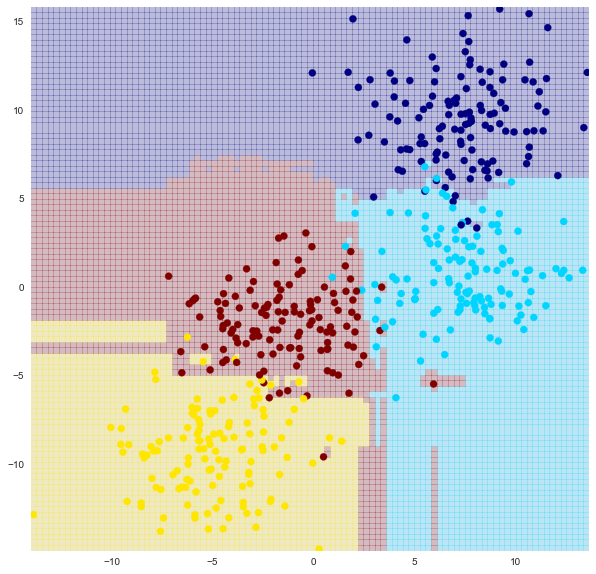

In [41]:
# create a random forest using scikit learn
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100, random_state=0)
visualise_tree(clf,X,y,boundaries=False)

### Random forest regression
Let's imagine we have some sort of weather data thats sinusoidal in nature with some noise. It has a slow oscillation component, a fast oscillation component, and then a random noise component.

In [42]:
x=10*np.random.rand(100)

In [45]:
def sin_model(x,sigma=0.2):
    noise = sigma*np.random.rand(len(x))
    return np.sin(5*x) + np.sin(0.5*x)+ noise

In [46]:
y=sin_model(x)

<Container object of 3 artists>

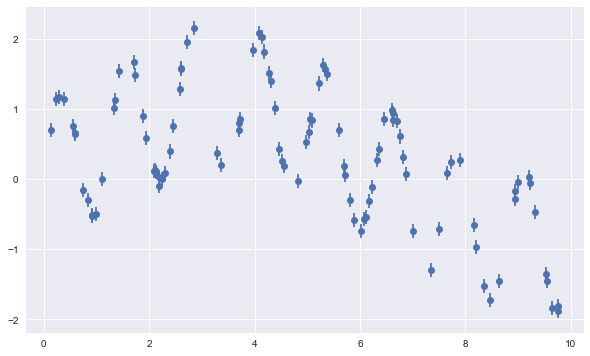

In [48]:
plt.figure(figsize=(10,6))

plt.errorbar(x,y,0.1,fmt='o')

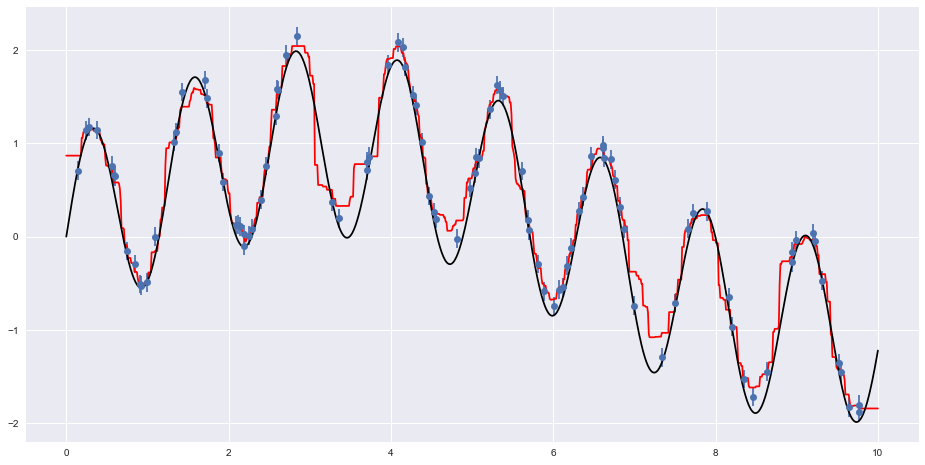

In [54]:
from sklearn.ensemble import RandomForestRegressor
xfit= np.linspace(0,10,1000)
rfr=RandomForestRegressor(100)
rfr.fit(x[:,None],y)    
yfit=rfr.predict(xfit[:,None])

ytrue=sin_model(xfit,sigma=0)

plt.figure(figsize=(16,8))
plt.errorbar(x,y,0.1,fmt='o')
plt.plot(xfit,yfit,'-r')
plt.plot(xfit,ytrue,'-k')

As you can see, the non-parametric random forest model is flexible enough to fit the multi-period data, without us even specifying a multi-period model!

This is a tradeoff between simplicity and thinking about what your data actually is.

Here are some more resources for Random Forests:

[Extensive Article on Wikipedia](https://en.wikipedia.org/wiki/Random_forest)

[A whole webpage form the inventors themselves! Leo Breiman and Adele Cutler](https://www.stat.berkeley.edu/~breiman/RandomForests/cc_home.htm)
